<a href="https://colab.research.google.com/github/melissatorgbi/ComputerVision/blob/main/Getting_Started_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

This notebook builds on the pathway lecture. You will be able to investigate and manipulate images and finally experiment with face detection and object detection.

# Imports

In [1]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Loading Images
In this section we take a image from the [OpenCV github repository](https://https://github.com/opencv/opencv/tree/4.x/samples/data).

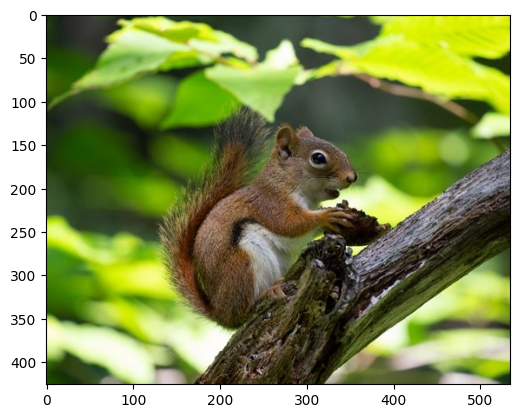

In [2]:
# reading an image from a url
original_image = io.imread('https://github.com/opencv/opencv/blob/4.x/samples/data/squirrel_cls.jpg?raw=true')
plt.imshow(original_image)
plt.show()

# Saving the Image

You can temporarily save the image in your colab dircetory (which can be found on the left hand side of this notebook). You can also upload your own images here.

In [3]:
# saving the image to temporary colab disk
io.imsave('image.jpg', original_image)

In [4]:
# this lists the folders and files in the current directory (you should see a file called image.jpg listed below)
!ls

image.jpg  sample_data


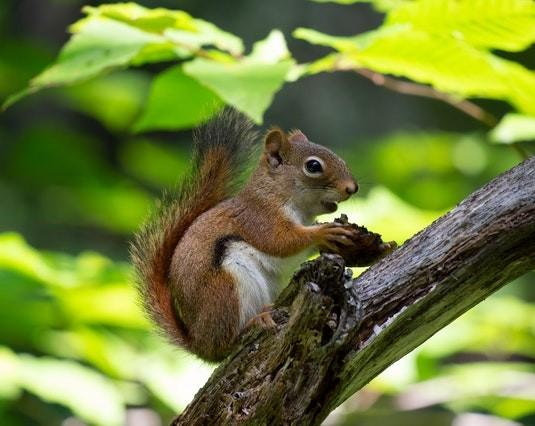

In [11]:
# loading the image from the temporary colab disk
image = cv2.imread('image.jpg')

cv2_imshow(image)

# Getting Started with Images

Run the code below and answer the following questions.

**Questions**

What are the dimensions of the image and what does this mean?
What does the size and dtype below represent?

What are the value of the pixel in positision (0,0) and (400, 100)? What do you think this means?

In [7]:
print("image shape:", image.shape)
print("image size:", image.size)
print("data type:", image.dtype)

image shape: (426, 535, 3)
image size: 683730
data type: uint8


In [9]:
# the following code will print the pixel values for the red, blue, and green channels at a specific pixel position
# Edit the numbers to change the position

print(image[0,0])

[14 55 28]


Find the squirrel pixels

**Task:** Can you edit numbers in the second code block to find the pixels for the squirrel?

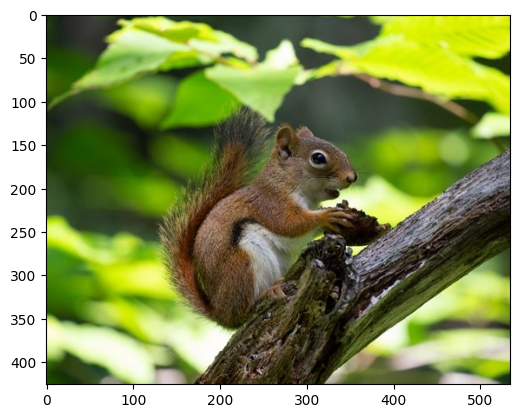

In [13]:
plt.imshow(original_image)
plt.show()

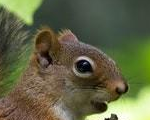

In [14]:
# find the squirrel by editing the numbers below
squirrel = image[100:220, 230:380]
cv2_imshow(squirrel)

**Task:** Edit the numbers in the code block below to draw a box around the squirrel.

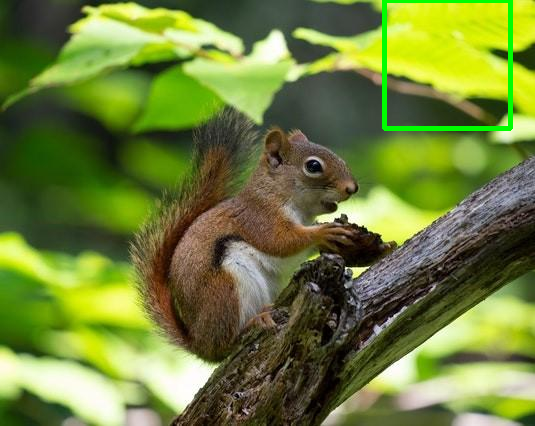

In [174]:
# Draw a Rectangle
image2 = original_image.copy()
image2 = cv2.rectangle(image,(384,0),(510,128),(0,255,0),3)
plt.imshow(image2)
plt.show()

# Colour Channels

You can split and merge the 3 colour channels as shown in the code below. You can also access each individual channel using `image[:,:,n]` where n represents the channel number, blue is 0, green is 1 and red is 2.




In [17]:
# splitting image channels
b,g,r = cv2.split(image)

# printing the red channel
print(r)

[[ 28  28  28 ... 176 148 126]
 [ 28  28  28 ... 198 177 161]
 [ 29  28  29 ... 210 199 189]
 ...
 [ 34  35  35 ...  22  21  22]
 [ 36  36  35 ...  29  28  26]
 [ 36  36  35 ...  29  28  26]]


In [ ]:
# merging image channels
image = cv2.merge((b,g,r))

In [19]:
# printing the red channel
print(image[:,:,2])

[[ 28  28  28 ... 176 148 126]
 [ 28  28  28 ... 198 177 161]
 [ 29  28  29 ... 210 199 189]
 ...
 [ 34  35  35 ...  22  21  22]
 [ 36  36  35 ...  29  28  26]
 [ 36  36  35 ...  29  28  26]]


Here we are experimentig with setting the green and blue channels to zero, so we are only showung the red channel.

**Task:** Experiment with the numbers below to see what happens

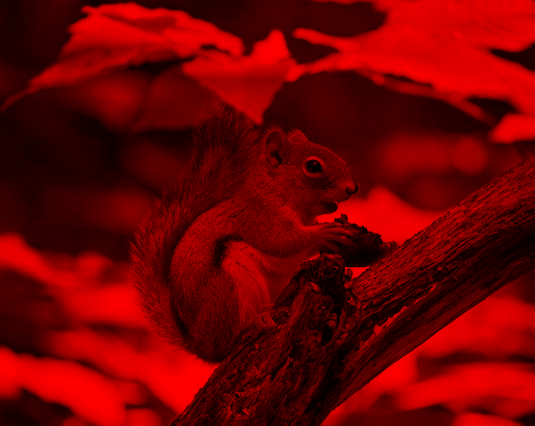

In [20]:
image2 = image.copy()
image2[:,:,1] = 0
image2[:,:,0] = 0
cv2_imshow(image2)

**Challenge Task:** How would you convert the image into grayscale? Can you implement this using code?

In [21]:
# Add you code for the challenge task here





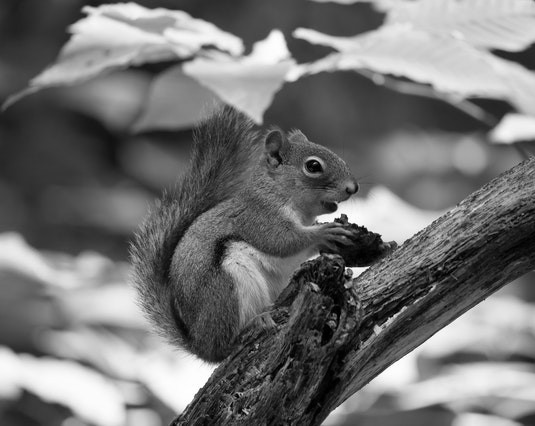

In [57]:
# This code converts the image to grayscale using the opencv function
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray_image)

# Edge Detection

In the lecture, we spoke about techniques that can be used to manipulate images. In this section there are some examples of edge detection.

**Question:** What differences do you notice in the output images?

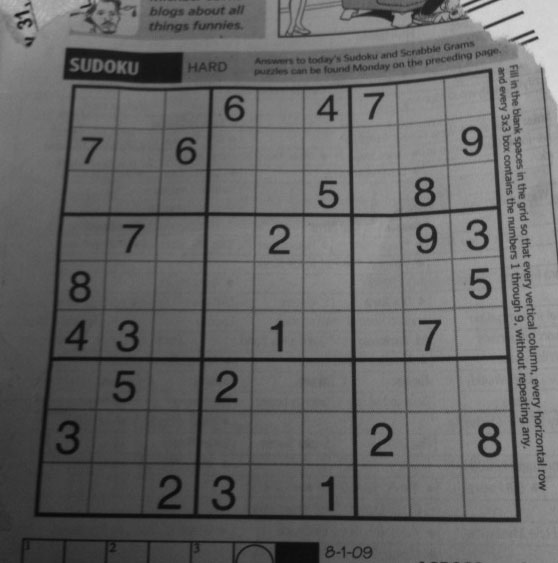

In [229]:
edge_image = io.imread('https://github.com/opencv/opencv/blob/4.x/samples/data/sudoku.png?raw=true')
gray_image = cv2.cvtColor(edge_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray_image)

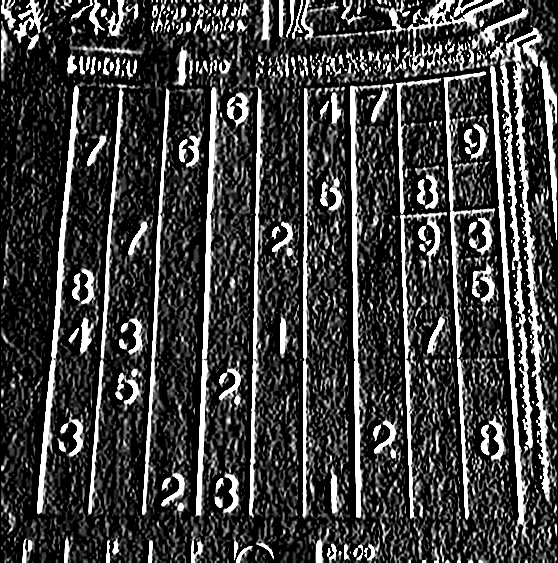

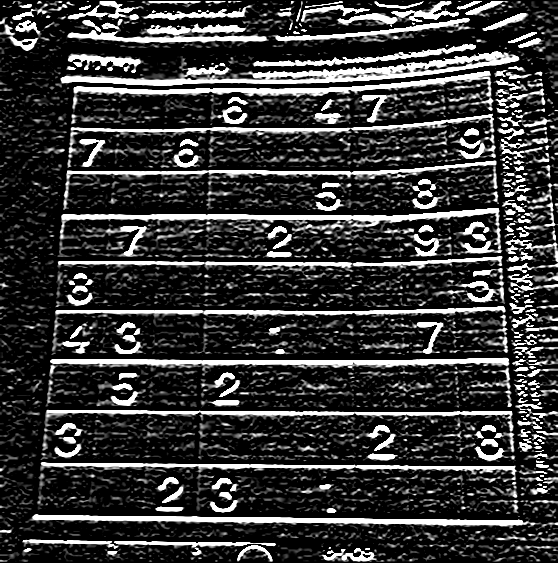

In [224]:
sobelx = cv2.Sobel(gray_image,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray_image,cv2.CV_64F,0,1,ksize=5)
cv2_imshow(sobelx)
cv2_imshow(sobely)

**Question:** What happens when you change the numbers below? Can you figure out what the numbers represent?

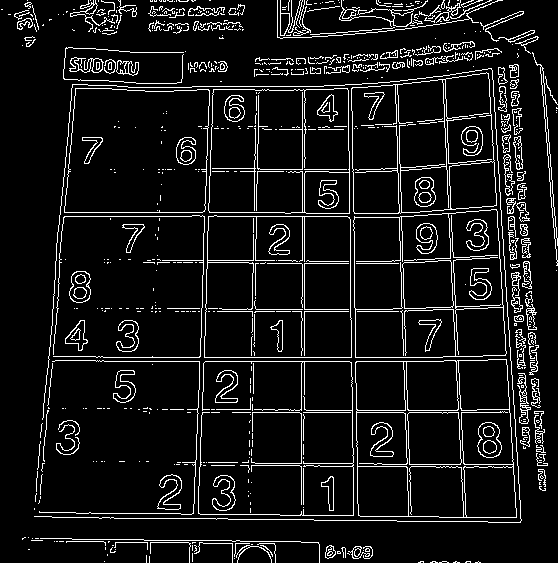

In [228]:
edges = cv2.Canny(gray_image, 100, 100)
cv2_imshow(edges)

# Face Detection

Using the methods discussed in the lecture, this code detects facces in images and draws a box around each face.

In [36]:
test_image = io.imread('https://github.com/opencv/opencv/blob/4.x/samples/data/messi5.jpg?raw=true')
gray_img = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

In [37]:
!git clone -q https://github.com/melissatorgbi/ComputerVision.git

fatal: destination path 'ComputerVision' already exists and is not an empty directory.


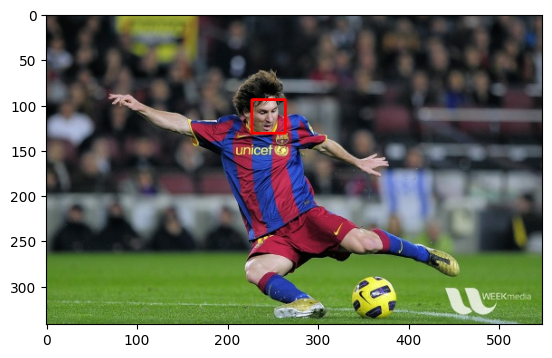

In [39]:
# this is a pre-trained face cascade

face_cascade = cv2.CascadeClassifier('ComputerVision/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_img, 1.1, 4)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(test_image)
plt.show()

**Task:** Experiment with loading in your own image

# Advanced Computer Vision

In [31]:
!pip install -q yolov7_package

In [25]:
from yolov7_package import Yolov7Detector

In [32]:
test_image = io.imread('https://github.com/opencv/opencv/blob/4.x/samples/data/messi5.jpg?raw=true')

In [33]:
det = Yolov7Detector(traced=False)
classes, boxes, scores = det.detect(test_image)
img = det.draw_on_image(test_image, boxes[0], scores[0], classes[0])

Fusing layers... 


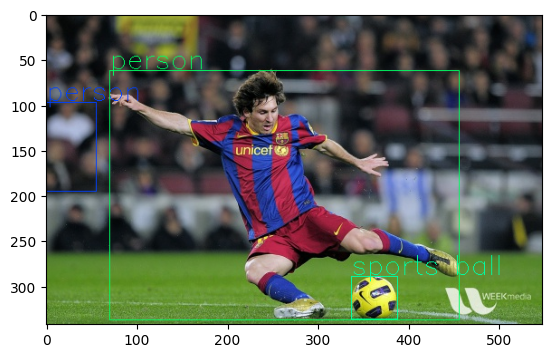

In [34]:
plt.imshow(img)
plt.show()